# Credit Card Fraud Detection using PCA

## Aim
This source code is to determine the credit card fraud dataset available on kaggle. It has 28 normalized and anonymized parameters. It also has a variable cost, which is the amount of transaction. I aim to use PCA to reduce the dimensions to 2D/3D projections and figure out any groupings or patterns in the fraudulent transactions. The data for this is too big to be uploaded to github, and so here is a link to it on [kaggle](https://www.kaggle.com/dalpozz/creditcardfraud). Download the dataset and unzip its contents to the same folder to use the script as it is.

## Import necessary headers

In [2]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('creditcard.csv')

In [9]:
print(len(df[df['Class'] == 0]))
print(len(df[df['Class'] == 1]))

284315
492


As can be seen, the dataset is severely biased towards normal transactions and has very few fraudulent transactions. Using these to identify such transactions in a Machine Learning prediction based model would be very tough and will result in a severly skewed model, with a very high accuracy but will not result in a scalable solution.

Let's drop tuples with missing values

In [10]:
df.dropna(how='all', inplace=True)

In [11]:
print(len(df[df['Class'] == 0]))
print(len(df[df['Class'] == 1]))

284315
492


There are no na's, Job made easier =)

The time parameter in the dataset is relative in nature and is of little use to us. Hence it can be dropped. All other parameters are retained.

In [14]:
df.drop('Time', inplace=True, axis=1)

In [15]:
print(df.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


Now let us take the necessary data to be projected as X and the Class labels as Y

In [43]:
X = df[df.columns[:-1]].as_matrix()

In [44]:
print(X.shape)

(284807, 29)


In [114]:
Y = df[df.columns[-1]].as_matrix()

In [46]:
print(Y.shape)

(284807,)


Let us scale the data to mean = 0 and variance = 1

In [47]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [48]:
print(np.sum(X_std, axis=0))

[ -2.52953214e-12  -3.63797881e-12  -1.36424205e-11  -5.57065505e-12
   1.09139364e-11   2.84217094e-12   4.20641300e-12   9.37916411e-13
   2.84217094e-14   1.50635060e-12  -8.18545232e-12   1.06865627e-11
   7.10542736e-14   6.93489710e-12  -9.09494702e-12   5.45696821e-12
   9.66338121e-13   7.95807864e-12   4.40536496e-13  -2.00373051e-12
  -1.42108547e-13   7.95807864e-13   2.67164069e-12   3.18323146e-12
  -1.45519152e-11   2.26307861e-12   3.51718654e-13  -1.80477855e-12
   8.29913915e-12]


In [49]:
X_std_1 = (X - np.mean(X, axis=0))/np.std(X, axis = 0)

In [50]:
print(np.sum(X_std_1, axis=0))

[ -2.52953214e-12  -3.63797881e-12  -1.36424205e-11  -5.57065505e-12
   1.09139364e-11   2.84217094e-12   4.20641300e-12   9.37916411e-13
   2.84217094e-14   1.50635060e-12  -8.18545232e-12   1.06865627e-11
   7.10542736e-14   6.93489710e-12  -9.09494702e-12   5.45696821e-12
   9.66338121e-13   7.95807864e-12   4.40536496e-13  -2.00373051e-12
  -1.42108547e-13   7.95807864e-13   2.67164069e-12   3.18323146e-12
  -1.45519152e-11   2.26307861e-12   3.51718654e-13  -1.80477855e-12
   8.29913915e-12]


As you can see both ways, the data is standardised to 0 mean and variance 1

In [55]:
mean = np.mean(X_std_1, axis=0)
cov_mat = (X_std_1 - mean).T.dot(X_std_1 - mean) / (X_std_1.shape[0]-1)


In [56]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [57]:
print(eig_vals)

[ 1.95784965  0.04215737  1.00000351  1.00000351  1.00000351  1.00000351
  1.00000351  1.00000351  1.00000351  1.00000351  1.00000351  1.00000351
  1.00000351  1.00000351  1.00000351  1.00000351  1.00000351  1.00000351
  1.00000351  1.00000351  1.00000351  1.00000351  1.00000351  1.00000351
  1.00000351  1.00000351  1.00000351  1.00000351  1.00000351]


From these values it is clear that the most information is contained in the eigen vector 1 as it has the value 1.95784965. So we will try to seperate it on 1 line. Else try to use the 2D projection.

In [80]:
matrix_w = eig_vecs[0]

In [61]:
Y_r = X_std_1.dot(matrix_w)

In [62]:
print(Y_r)

[-0.44158689  0.24111216 -2.88944607 ..., -1.35837896  0.25759554
  0.84068103]


In [63]:
len(Y_r)

284807

In [64]:
len(matrix_w)

29

In [65]:
X_std_1.shape

(284807, 29)

In [66]:
%matplotlib inline

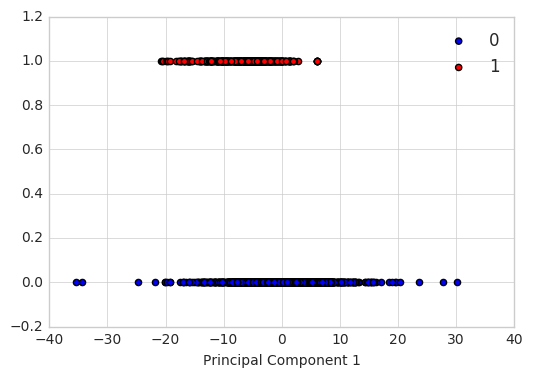

In [73]:
from matplotlib import pyplot as plt
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((0,1), 
                        ('blue', 'red')):
        if lab == 0:
            plt.scatter(Y_r[Y==lab], np.zeros(len(Y_r[Y==lab])), label=lab, c=col)
        else:
            plt.scatter(Y_r[Y==lab], np.ones(len(Y_r[Y==lab])), label=lab, c=col)
    plt.xlabel('Principal Component 1')
    plt.legend(loc='upper right')

For visualisation, I have plotted it on 2 seperate lines. There is no real seperation between the data. So now will try by addind 2 dimensions.

In [94]:
matrix_w = np.vstack((eig_vecs[0], eig_vecs[2]))

In [95]:
matrix_w

array([[-0.168101  ,  0.168101  , -0.00354874, -0.01324461,  0.03937638,
        -0.18150574, -0.01158544, -0.15293622,  0.15111219,  0.06811646,
        -0.37569696,  0.81747733, -0.10715345,  0.24845099, -0.10384643,
        -0.00329663, -0.30712687,  0.29509055,  0.27173914, -0.44496229,
        -0.0140284 , -0.28405816,  0.01884906, -0.0977442 ,  0.03080543,
        -0.40391927,  0.08418226,  0.20057408, -0.16843822],
       [-0.15567797,  0.15567797, -0.01824447, -0.00573338,  0.07259412,
        -0.23204343,  0.03065719, -0.00471311,  0.02067929, -0.15130723,
        -0.38762315, -0.06515547,  0.01422324, -0.19908464, -0.05327122,
        -0.1386717 ,  0.39534942, -0.15720473, -0.4055319 ,  0.07375088,
        -0.0233603 ,  0.21839365,  0.08450557, -0.23064194,  0.29751327,
         0.21395298, -0.08347757, -0.19734712, -0.14079418]])

In [99]:
Y_r = X_std_1.dot(matrix_w.T)
len(Y_r[1])

2

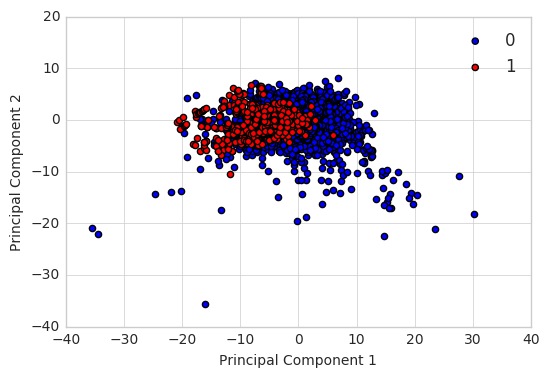

In [102]:
from matplotlib import pyplot as plt
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((0,1), ('blue', 'red')):
        plt.scatter(Y_r[Y==lab, 0], Y_r[Y==lab, 1], label=lab, c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper right')

Now there is good seperation for values where -20< PC1 < 10 and -10 < PC2 < 10

In [104]:
matrix_w = np.vstack((eig_vecs[0], eig_vecs[2], eig_vecs[3]))
Y_r = X_std_1.dot(matrix_w.T)
len(Y_r[1])

3

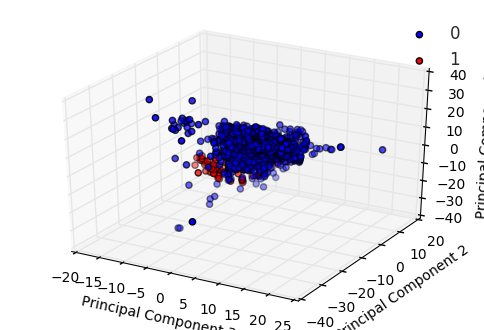

In [111]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')

with plt.style.context('seaborn-whitegrid'):
    for lab, col in zip((0,1), ('blue', 'red')):
        ax.scatter(Y_r[Y==lab, 2], Y_r[Y==lab, 1], Y_r[Y==lab, 0], label=lab, c=col)
    ax.set_xlabel('Principal Component 3')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 1')
    ax.legend(loc='upper right')

plt.savefig('pca.pdf')


As can be seen, there is now a clear distinction between the class 0 denoting non-fraudulent transaction and class 1 denoting fraudulent transactions. This clearly shows how PCA can be used to reduce high dimensional data to just 3 dimensions. Now this data can be given as input to a simple linear classifier and it will definitely perform better than giving all the 28 variables to the classifier. This however cannot be assumed for deep learning or ANNs because there the features are autoselected due automatically readjusting weights.